In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

In [2]:
%run ./auxiliarfunctions.ipynb

### - Understanding dirichlet distribution

With distribuition 1, 1, 1 without weight diference

Text(0.5, 1.0, 'Dirichlet distribution')

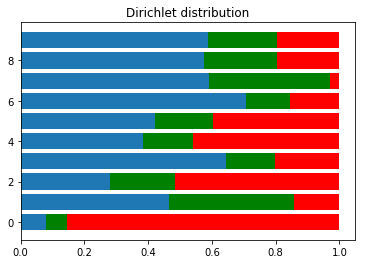

In [3]:
size = 10
d1 = np.random.dirichlet((1, 1, 1), size)
d1_t = d1.transpose()

plt.barh(range(size), d1_t[0])
plt.barh(range(size), d1_t[1], left=d1_t[0], color='g')
plt.barh(range(size), d1_t[2], left=d1_t[0]+d1_t[1], color='r')
plt.title("Dirichlet distribution")

#### - Check variance, mean, median

In [4]:
df1 = pd.DataFrame(data = d1.T)
df1T = df1.describe()
df1_median = pd.DataFrame(calculate_median(df1)).T
df1_var = pd.DataFrame(calculate_variance(df1)).T

In [5]:
df1_describe = df1T.append(df1_median)
df1_describe.rename(index={0:'median'}, inplace=True)
df1_describe = df1_describe.append(df1_var)
df1_describe.rename(index={0:'variance'}, inplace=True)

In [6]:
df1_describe

,0,1,2,3,4,5,6,7,8,9
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333
std,0.451109,0.168764,0.162468,0.271192,0.158295,0.131628,0.322508,0.283659,0.209657,0.219458
min,0.067435,0.143040,0.204755,0.151922,0.156136,0.181876,0.139203,0.029578,0.195586,0.196651
25%,0.072905,0.267575,0.242035,0.177456,0.269617,0.289956,0.147190,0.204334,0.212691,0.206764
50%,0.078375,0.392110,0.279316,0.202990,0.383098,0.398036,0.155178,0.379090,0.229796,0.216876
75%,0.466283,0.428480,0.397623,0.424039,0.421932,0.409062,0.430398,0.485211,0.402207,0.401675
max,0.854191,0.464850,0.515929,0.645088,0.460766,0.420088,0.705619,0.591333,0.574618,0.586473
median,0.078375,0.392110,0.279316,0.202990,0.383098,0.398036,0.155178,0.379090,0.229796,0.216876
variance,0.203499,0.028481,0.026396,0.073545,0.025057,0.017326,0.104011,0.080462,0.043956,0.048162


With distribuition 99, 1, 1 with weight diference and concentration, alpha

Text(0.5, 1.0, 'Dirichlet Distribution')

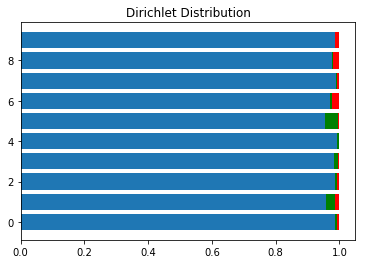

In [7]:
d2 = np.random.dirichlet((99, 1, 1), size)

d2_t = d2.transpose()

plt.barh(range(size), d2_t[0])
plt.barh(range(size), d2_t[1], left=d2_t[0], color='g')
plt.barh(range(size), d2_t[2], left=d2_t[0]+d2_t[1], color='r')
plt.title("Dirichlet Distribution")

#### - Check variance, mean, median

In [8]:
df2 = pd.DataFrame(data = d2.T)
df2T = df2.describe()
df2_median = pd.DataFrame(calculate_median(df2)).T
df2_var = pd.DataFrame(calculate_variance(df2)).T

In [9]:
df2_describe = df2T.append(df2_median)
df2_describe.rename(index={0:'median'}, inplace=True)
df2_describe = df2_describe.append(df2_var)
df2_describe.rename(index={0:'variance'}, inplace=True)

In [10]:
df2_describe

,0,1,2,3,4,5,6,7,8,9
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333
std,0.564624,0.541111,0.564117,0.563219,0.569673,0.539118,0.551717,0.567513,0.557852,0.563992
min,0.006979,0.012624,0.007336,0.003137,0.002373,0.003230,0.006204,0.003150,0.003837,0.002766
25%,0.007348,0.020960,0.007640,0.008172,0.004435,0.022268,0.014838,0.005683,0.011286,0.007725
50%,0.007717,0.029296,0.007945,0.013207,0.006496,0.041306,0.023472,0.008216,0.018735,0.012684
75%,0.496511,0.493688,0.496332,0.498432,0.498814,0.498385,0.496898,0.498425,0.498082,0.498617
max,0.985305,0.958080,0.984719,0.983656,0.991131,0.955465,0.970323,0.988634,0.977428,0.984550
median,0.007717,0.029296,0.007945,0.013207,0.006496,0.041306,0.023472,0.008216,0.018735,0.012684
variance,0.318800,0.292801,0.318228,0.317215,0.324527,0.290648,0.304392,0.322071,0.311199,0.318087


### - Simulate cases in participative platform

In [11]:
categories = 4
comments = 100
alpha = 0.520
s = np.random.dirichlet((2 * alpha, alpha), (categories, comments))
c1, c2, c3, c4 = s[:, :, 0]

In [12]:
s[0][:5]

array([[0.85691116, 0.14308884],
       [0.93992776, 0.06007224],
       [0.0587871 , 0.9412129 ],
       [0.96699903, 0.03300097],
       [0.13968101, 0.86031899]])

In [13]:
s[0][0].sum()

1.0

Text(0.5, 1.0, 'Dirichlet Distribution')

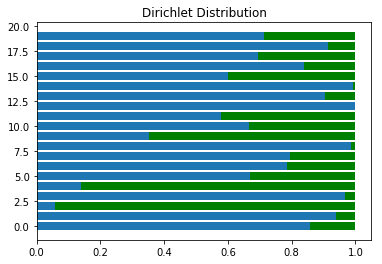

In [14]:
sT = s[0][:20].transpose()

plt.barh(range(20), sT[0])
plt.barh(range(20), sT[1], left=sT[0], color='g')
plt.title("Dirichlet Distribution")

In [15]:
print('percentage to agree and disagree in first vote: ', s[0][0])
print('sum of percentages: ', s[0][0].sum())
print('how many categories and comments was voted: ', s.shape)

percentage to agree and disagree in first vote:  [0.85691116 0.14308884]
sum of percentages:  1.0
how many categories and comments was voted:  (4, 100, 2)


In [16]:
votes1 = np.random.random(size=(100, comments)) < c1
votes2 = np.random.random(size=(70, comments)) < c2
votes3 = np.random.random(size=(120, comments)) < c3
votes4 = np.random.random(size=(90, comments)) < c4

In [17]:
# Agree and disagree
votes1[1,:5]

array([ True,  True, False,  True, False])

In [18]:
votes = np.vstack([votes1,votes2,votes3,votes4])

In [19]:
votes.shape

(380, 100)

In [20]:
pca = PCA(n_components=2).fit_transform(votes)

In [21]:
pca.shape

(380, 2)

In [22]:
pca[:5]

array([[-3.18472113e-01,  2.29051735e+00],
       [ 1.85721474e-03,  2.61519954e+00],
       [-5.79879263e-01,  2.21584762e+00],
       [-2.03189061e-01,  2.37395582e+00],
       [-4.65015834e-01,  2.07576664e+00]])

In [23]:
df = pd.DataFrame(pca)

#### - Plot with different color for each category

In [24]:
labels = []

In [25]:
define_labels(votes1,'A')
define_labels(votes2,'B')
define_labels(votes3,'C')
define_labels(votes4,'D')

In [26]:
len(labels) == len(votes)

True

In [27]:
label_color_dict = {'A':'red','B':'green','C':'blue','D':'magenta'}

In [28]:
color_votes = [label_color_dict[label] for label in labels]

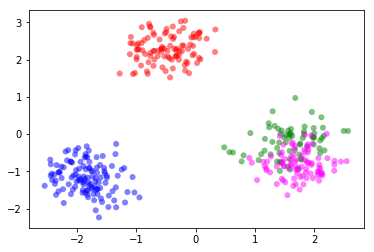

In [29]:
# plt.scatter(*pca.T)
#plt.scatter(*pca.T, c=color_votes, edgecolor='', alpha=0.5) 
plt.scatter(x=df[0], y=df[1], c=color_votes, edgecolor='', alpha=0.5) 

In [30]:
pca = PCA(n_components=50).fit_transform(votes)

In [31]:
df_pca = pd.concat([pd.DataFrame(pca),pd.DataFrame(labels, columns=['category'])], axis=1, sort=False)

In [32]:
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,category
0,-0.318472,2.290517,-0.673410,-0.416026,0.271583,-0.021403,-0.162530,0.362477,1.661427,0.012506,...,0.131509,0.102554,-0.758753,0.026215,-0.102142,0.807478,-0.072716,-0.082011,0.132573,A
1,0.001857,2.615200,-0.155412,0.078800,0.080637,0.455903,-0.363065,0.478751,-0.193851,0.093949,...,-0.360144,0.265114,-0.587863,-0.004639,0.190789,0.477978,-0.091255,-0.805828,-0.453571,A
2,-0.579879,2.215848,0.010243,0.284158,0.357283,-0.586176,0.118327,-0.107090,0.493397,-0.662923,...,0.281038,0.167519,-0.063941,-0.540820,-0.044184,0.375940,-0.272168,0.214079,-0.831271,A
3,-0.203189,2.373956,-0.355501,1.430361,-0.735333,-0.066361,0.337088,-0.684530,0.166437,0.778328,...,0.396447,0.144458,-0.067084,0.170688,-0.024347,0.611336,-0.294406,-0.665682,-0.009797,A
4,-0.465016,2.075767,-0.182751,0.578946,-0.445996,0.189424,-1.034040,-0.882003,0.621654,1.043386,...,0.008908,-0.328170,-0.477161,-0.412880,0.251341,-0.385065,-0.274970,0.286439,0.329484,A


In [33]:
df_pca = df_pca.rename(columns={0:'A'})

In [34]:
df_pca.head(3)

,A,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,category
0,-0.318472,2.290517,-0.673410,-0.416026,0.271583,-0.021403,-0.162530,0.362477,1.661427,0.012506,...,0.131509,0.102554,-0.758753,0.026215,-0.102142,0.807478,-0.072716,-0.082011,0.132573,A
1,0.001857,2.615200,-0.155412,0.078800,0.080637,0.455903,-0.363065,0.478751,-0.193851,0.093949,...,-0.360144,0.265114,-0.587863,-0.004639,0.190789,0.477978,-0.091255,-0.805828,-0.453571,A
2,-0.579879,2.215848,0.010243,0.284158,0.357283,-0.586176,0.118327,-0.107090,0.493397,-0.662923,...,0.281038,0.167519,-0.063941,-0.540820,-0.044184,0.375940,-0.272168,0.214079,-0.831271,A


#### - Analyse votes statistics 

In [35]:
raw_data = df_raw_data(votes1, votes2, votes3, votes)
df_votes_math = pd.DataFrame(raw_data, columns = ['votes', 'std', 'mean', 'var'])

In [36]:
df_votes_math

,votes,std,mean,var
0,votes 1,0.470501,0.669200,0.221371
1,votes 2,0.471589,0.666143,0.222397
2,votes 3,0.464283,0.685583,0.215559
3,votes 4,0.478378,0.645444,0.228846
4,all votes,0.470865,0.668184,0.221714


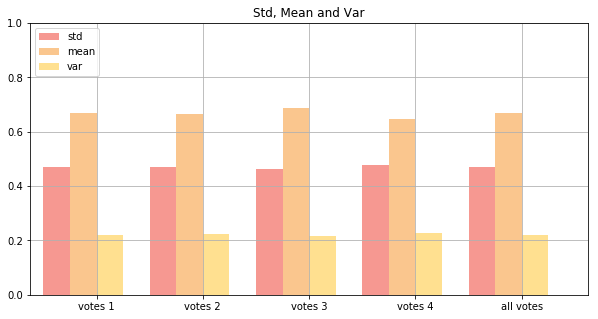

In [37]:
plot_compare_votes_group(df_votes_math)

#### - Use PCA and GaussianNB agreed/not comment 

In [38]:
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [39]:
accs = []
ncols = df_pca.iloc[:, :-1].shape[0]
ncols

380

In [40]:
#X_train, X_test, y_train, y_test = train_test_split(df_pca.iloc[:,:-1], df_pca['category'][:], test_size = 0.33, random_state=50)
for i in range(5, ncols):
    print('I', i)
    X_train, X_test, y_train, y_test = train_test_split(df_pca.iloc[0:i,:-1], df_pca['category'][0:i], test_size = 0.33, random_state=50)
    gaus = GaussianNB()
    gaus.fit(X_train, y_train)
    y_exp = y_test
    y_pred = gaus.predict(X_test)
    acc =  accuracy_score(y_exp, y_pred)
    print("acc: ", acc)
    accs.append({'acc': acc, 'qtd': i})

I 5
acc:  1.0
I 6
acc:  1.0
I 7
acc:  1.0
I 8
acc:  1.0
I 9
acc:  1.0
I 10
acc:  1.0
I 11
acc:  1.0
I 12
acc:  1.0
I 13
acc:  1.0
I 14
acc:  1.0
I 15
acc:  1.0
I 16
acc:  1.0
I 17
acc:  1.0
I 18
acc:  1.0
I 19
acc:  1.0
I 20
acc:  1.0
I 21
acc:  1.0
I 22
acc:  1.0
I 23
acc:  1.0
I 24
acc:  1.0
I 25
acc:  1.0
I 26
acc:  1.0
I 27
acc:  1.0
I 28
acc:  1.0
I 29
acc:  1.0
I 30
acc:  1.0
I 31
acc:  1.0
I 32
acc:  1.0
I 33
acc:  1.0
I 34
acc:  1.0
I 35
acc:  1.0
I 36
acc:  1.0
I 37
acc:  1.0
I 38
acc:  1.0
I 39
acc:  1.0
I 40
acc:  1.0
I 41
acc:  1.0
I 42
acc:  1.0
I 43
acc:  1.0
I 44
acc:  1.0
I 45
acc:  1.0
I 46
acc:  1.0
I 47
acc:  1.0
I 48
acc:  1.0
I 49
acc:  1.0
I 50
acc:  1.0
I 51
acc:  1.0
I 52
acc:  1.0
I 53
acc:  1.0
I 54
acc:  1.0
I 55
acc:  1.0
I 56
acc:  1.0
I 57
acc:  1.0
I 58
acc:  1.0
I 59
acc:  1.0
I 60
acc:  1.0
I 61
acc:  1.0
I 62
acc:  1.0
I 63
acc:  1.0
I 64
acc:  1.0
I 65
acc:  1.0
I 66
acc:  1.0
I 67
acc:  1.0
I 68
acc:  1.0
I 69
acc:  1.0
I 70
acc:  1.0
I 71
acc:  1.0


In [41]:
len(accs)

375

In [42]:
df_accs = pd.DataFrame.from_dict(accs)

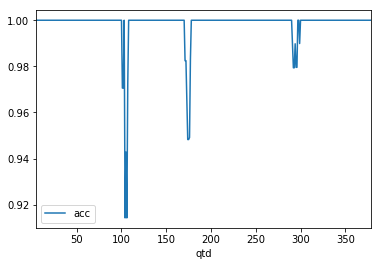

In [43]:
df_accs.plot.line(x='qtd', y='acc')

In [44]:
y_exp[:4], y_pred[:4]

(137    B
 67     A
 115    B
 297    D
 Name: category, dtype: object, array(['B', 'A', 'B', 'D'], dtype='<U1'))

In [45]:
print("acc: ", accuracy_score(y_exp, y_pred))

acc:  1.0


In [46]:
print(metrics.confusion_matrix(y_exp, y_pred))

[[36  0  0  0]
 [ 0 29  0  0]
 [ 0  0 39  0]
 [ 0  0  0 22]]


#### - Applying Bernoulli to predict Agreed/Not comment

In [47]:
s.shape, votes.shape

((4, 100, 2), (380, 100))

In [48]:
df1 = pd.DataFrame(votes1)
df1['category'] = 1
df2 = pd.DataFrame(votes2)
df2['category'] = 2
df3 = pd.DataFrame(votes3)
df3['category'] = 3
df4 = pd.DataFrame(votes4)
df4['category'] = 4

In [49]:
frames = [df1, df2, df3, df4]

In [50]:
df = pd.concat(frames)

In [51]:
df = df.reset_index()

In [52]:
df[0][1]

True

In [53]:
d = {False:0,True:1}
df = df.replace(d)

In [54]:
df.head(3)

,index,0,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,category
0,0,1,1,1,1,0,1,1,0,1,...,0,1,1,1,1,1,1,0,1,1
1,1,1,1,0,1,0,1,1,1,1,...,1,0,1,1,1,1,1,0,1,1
2,2,1,1,0,1,0,1,1,1,1,...,1,1,1,1,1,0,1,0,1,1


In [55]:
# without first and category column
df_teste = df.iloc[:, 1:-1]
df_teste.head(3)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1,1,1,1,0,1,1,0,1,0,...,1,0,1,1,1,1,1,1,0,1
1,1,1,0,1,0,1,1,1,1,0,...,0,1,0,1,1,1,1,1,0,1
2,1,1,0,1,0,1,1,1,1,1,...,1,1,1,1,1,1,0,1,0,1


In [56]:
df[:][:].shape, df_teste.shape

((380, 102), (380, 100))

In [57]:
accs = []

In [58]:
ncols = df.iloc[:, 1:-1].shape[1]

In [59]:
for i in range(2, ncols):
    print('I', i)
    X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:i], df['category'], test_size = 0.2)#, random_state=17)
    bern = BernoulliNB()
    bern.fit(X_train, y_train)
    y_exp = y_test
    y_pred = bern.predict(X_test)
    acc =  accuracy_score(y_exp, y_pred)
    print("acc: ", acc)
    accs.append({'acc': acc, 'qtd': i})

I 2
acc:  0.32894736842105265
I 3
acc:  0.5131578947368421
I 4
acc:  0.7631578947368421
I 5
acc:  0.881578947368421
I 6
acc:  0.868421052631579
I 7
acc:  0.868421052631579
I 8
acc:  0.9210526315789473
I 9
acc:  0.9473684210526315
I 10
acc:  0.9342105263157895
I 11
acc:  0.9605263157894737
I 12
acc:  0.9868421052631579
I 13
acc:  0.9342105263157895
I 14
acc:  0.9342105263157895
I 15
acc:  0.9605263157894737
I 16
acc:  0.9868421052631579
I 17
acc:  0.9736842105263158
I 18
acc:  0.9210526315789473
I 19
acc:  0.9868421052631579
I 20
acc:  0.9342105263157895
I 21
acc:  0.9868421052631579
I 22
acc:  0.9736842105263158
I 23
acc:  0.9473684210526315
I 24
acc:  0.9736842105263158
I 25
acc:  0.9868421052631579
I 26
acc:  0.9605263157894737
I 27
acc:  0.9868421052631579
I 28
acc:  0.9605263157894737
I 29
acc:  0.9868421052631579
I 30
acc:  1.0
I 31
acc:  0.9868421052631579
I 32
acc:  1.0
I 33
acc:  0.9736842105263158
I 34
acc:  1.0
I 35
acc:  0.9868421052631579
I 36
acc:  0.9868421052631579
I 37


In [60]:
df_accs = pd.DataFrame.from_dict(accs)

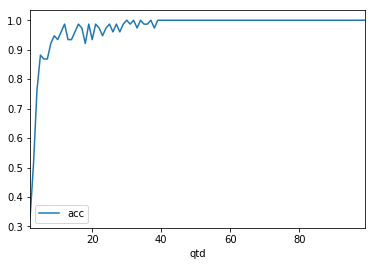

In [61]:
df_accs.plot.line(x='qtd', y='acc')

In [62]:
print("acc: ", accuracy_score(y_exp, y_pred))
print(metrics.classification_report(y_exp, y_pred))
print(metrics.confusion_matrix(y_exp, y_pred))

acc:  1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        17

   micro avg       1.00      1.00      1.00        76
   macro avg       1.00      1.00      1.00        76
weighted avg       1.00      1.00      1.00        76

[[17  0  0  0]
 [ 0 14  0  0]
 [ 0  0 28  0]
 [ 0  0  0 17]]
